In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def saveLatentVectors(filename , latent_vectors ):
    torch.save(latent_vectors , './Latent_Vectors/' + filename)
    return

In [3]:
def loadLatentVectors(filename):
    latent_vectors = torch.load('./Latent_Vectors/' + filename)
    return latent_vectors

In [4]:
numerical_latent_vectors = loadLatentVectors('numerical_latent_vectors')

## Section 4

### 4.1 Open message

You are asked to generate one list of digits/letters that will represent one message. Therefore, you have to find corresponding latent vectors that we call the ”message latent vectors” and put them, in order, in a PyTorch tensor. Then, you have to save it in a file thanks to the saveLatentVectors function provided below. You can also load previously saved latent vectors with loadLatentVectors.

We created an application, in which you can input a message combined with all digital numbers, a birth date, for example, with the meaning of the message. It will generate a graph showing the digits you have already input and save it in the `./Latent_Vectors/` folder named the meaning of this message. You can change the message and its meaning of it by using the function `show_message(message, meaning)`.

In [5]:
def show_message(message, meaning, latenet_vectors=numerical_latent_vectors):
    latent_vectors_list = []

    numerical_list = [*message]

    n_cols = 4
    n_rows = int(np.ceil(len(numerical_list)/4))
    f = plt.figure("Messages", figsize = (20,15))
    f.suptitle(meaning, fontsize = 30)
    f.subplots_adjust(wspace=0.2, hspace=0.2)
    j = 0
    for i in numerical_list:
        latent_vectors_list.append(latenet_vectors[eval(i)][0])
        fi = f.add_subplot(n_rows, n_cols, j + 1)
        fi.imshow(latenet_vectors[eval(i)][0].detach().numpy(), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])

        j += 1
    plt.show()
    f.savefig('./Figures/' + meaning + '.png')

    saveLatentVectors(meaning, torch.stack(latent_vectors_list))

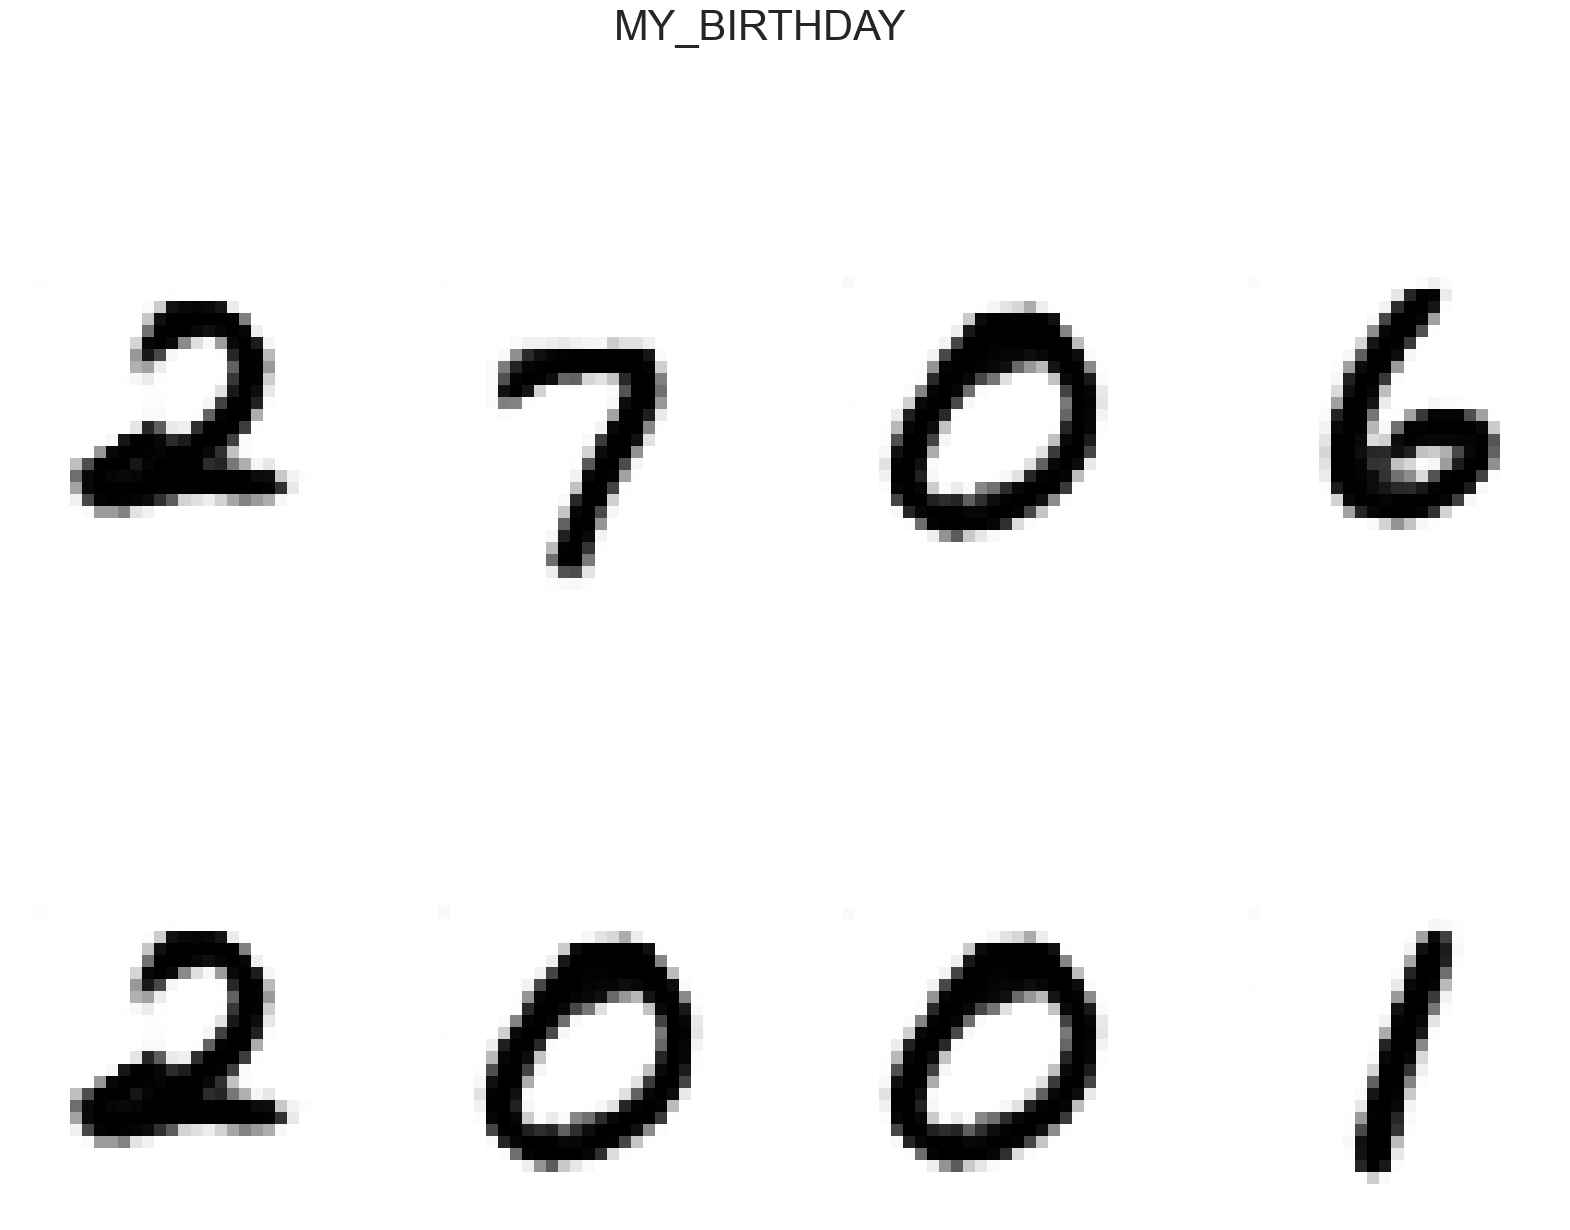

In [6]:
# Example 1
show_message(message="27062001", meaning="MY_BIRTHDAY")

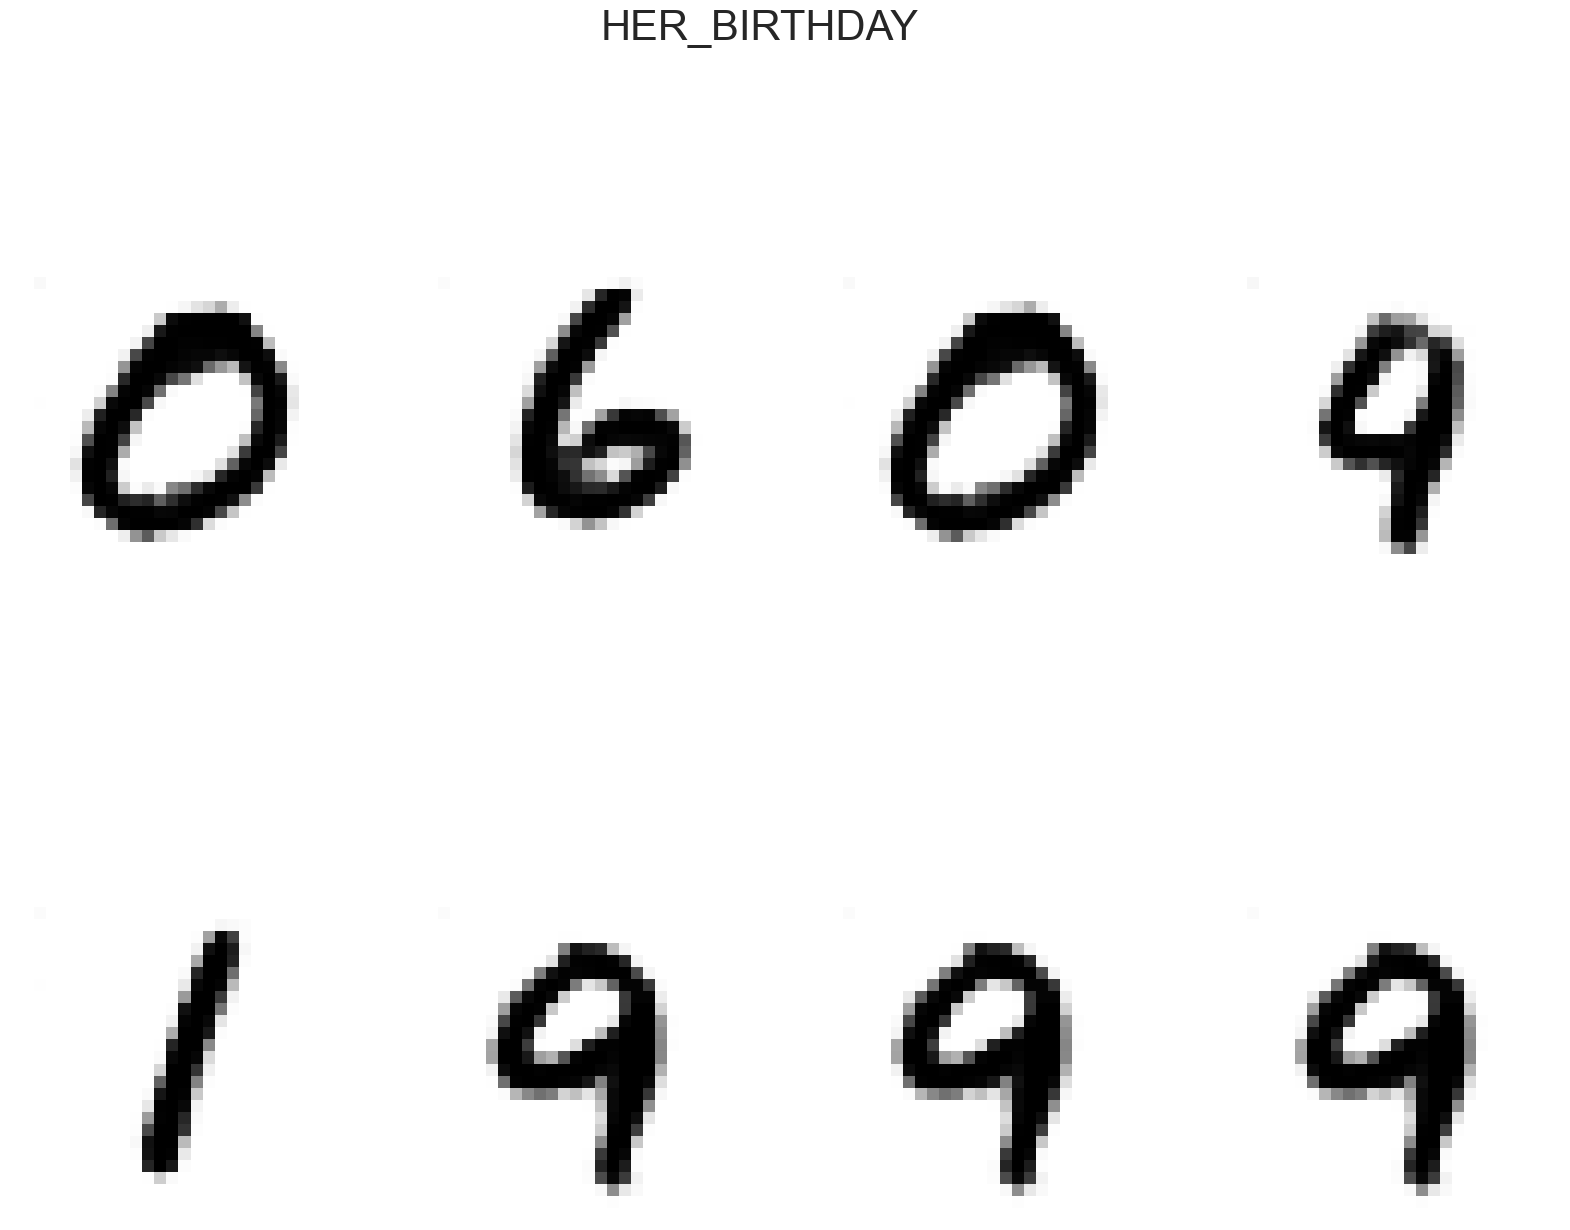

In [7]:
# Example 2
show_message(message="06041999", meaning="HER_BIRTHDAY")